In [1]:
# BIGDATA BOWL EDA
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels import robust


player_play = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/player_play.csv")
player_play


plays = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/plays.csv")
plays

plays_df = plays.dropna(subset=['pff_manZone'])
plays_df.columns



Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [2]:
plays_df['offenseFormation'].unique()

array(['EMPTY', 'SHOTGUN', 'PISTOL', 'SINGLEBACK', 'JUMBO', 'I_FORM',
       'WILDCAT', nan], dtype=object)

In [3]:
plays_df[plays_df['offenseFormation'] == 'EMPTY']

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
12,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,25,...,0,0.003262,-0.003262,-1.071627,True,NaN,NaN,0,Cover-2,Zone
17,2022102308,3304,"(2:57) (No Huddle, Shotgun) D.Mills pass incom...",4,2,1,HOU,LV,HOU,29,...,0,0.000007,-0.000007,-0.373242,True,NaN,NaN,0,Quarters,Zone
18,2022110607,3178,(9:59) (Shotgun) T.Heinicke pass short left to...,4,2,7,WAS,MIN,WAS,28,...,-2,-0.016307,0.016307,-0.708830,True,NaN,NaN,0,Quarters,Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,2022103003,1462,(9:11) (Shotgun) J.Goff pass incomplete short ...,2,2,10,DET,MIA,MIA,43,...,0,-0.010526,0.010526,-0.817297,True,NaN,NaN,0,Cover-2,Zone
16083,2022091803,365,(8:05) (Shotgun) T.Lawrence pass short right t...,1,4,3,JAX,IND,IND,47,...,8,0.087903,-0.087903,3.664834,True,NaN,NaN,0,Cover-1,Man
16092,2022103006,557,(6:20) (Shotgun) A.Dalton pass short left to A...,1,1,10,NO,LV,NO,31,...,8,0.006818,-0.006818,0.586911,True,NaN,NaN,0,Cover-0,Man
16095,2022102308,3347,"(2:25) (No Huddle, Shotgun) D.Mills pass short...",4,1,10,HOU,LV,HOU,37,...,6,-0.000029,0.000029,0.133130,True,NaN,NaN,0,Cover-6 Right,Zone


In [35]:
tracking1 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv")
tracking2 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv")
tracking3 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv")
tracking4 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv")
tracking5 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv")
tracking6 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv")
tracking7 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv")
tracking8 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv")
tracking9 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv")

dfs = [] 
file_list = ["/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv"]
for file in file_list:
    data = pd.read_csv(file)
    dfs.append(data) 
tracking_df = pd.concat(dfs, ignore_index=True)
tracking_df

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.060000,28.550000,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.130000,28.570000,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.200000,28.590000,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.260000,28.620000,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.320000,28.650000,0.65,0.34,0.07,245.74,62.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59327368,2022110300,3579,NaN,football,37,AFTER_SNAP,2022-11-04 03:04:35.5,NaN,football,left,74.830002,29.870001,0.00,0.00,0.00,NaN,NaN,qb_kneel
59327369,2022110300,3579,NaN,football,38,AFTER_SNAP,2022-11-04 03:04:35.6,NaN,football,left,74.830002,29.870001,0.00,0.00,0.00,NaN,NaN,NaN
59327370,2022110300,3579,NaN,football,39,AFTER_SNAP,2022-11-04 03:04:35.7,NaN,football,left,74.830002,29.870001,0.00,0.00,0.00,NaN,NaN,NaN
59327371,2022110300,3579,NaN,football,40,AFTER_SNAP,2022-11-04 03:04:35.8,NaN,football,left,74.830002,29.870001,0.00,0.00,0.00,NaN,NaN,NaN


In [36]:
tracking_df[(tracking_df['gameId'] == 2022090800)
            & (tracking_df['playId'] == 80)]

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6691344,2022090800,80,35472.0,Rodger Saffold,1,BEFORE_SNAP,2022-09-09 00:24:24.5,76.0,BUF,left,80.340000,28.000000,0.10,0.08,0.01,259.36,302.41,NaN
6691345,2022090800,80,35472.0,Rodger Saffold,2,BEFORE_SNAP,2022-09-09 00:24:24.6,76.0,BUF,left,80.330000,28.000000,0.09,0.08,0.01,259.36,301.92,NaN
6691346,2022090800,80,35472.0,Rodger Saffold,3,BEFORE_SNAP,2022-09-09 00:24:24.7,76.0,BUF,left,80.340000,28.000000,0.07,0.06,0.01,260.31,304.57,NaN
6691347,2022090800,80,35472.0,Rodger Saffold,4,BEFORE_SNAP,2022-09-09 00:24:24.8,76.0,BUF,left,80.340000,28.000000,0.06,0.06,0.00,262.11,303.64,NaN
6691348,2022090800,80,35472.0,Rodger Saffold,5,BEFORE_SNAP,2022-09-09 00:24:24.9,76.0,BUF,left,80.330000,28.010000,0.06,0.06,0.01,262.73,306.47,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694605,2022090800,80,NaN,football,138,AFTER_SNAP,2022-09-09 00:24:38.2,NaN,football,left,73.129997,42.470001,5.30,4.13,0.54,NaN,NaN,tackle
6694606,2022090800,80,NaN,football,139,AFTER_SNAP,2022-09-09 00:24:38.3,NaN,football,left,72.870003,42.910000,4.89,4.12,0.51,NaN,NaN,NaN
6694607,2022090800,80,NaN,football,140,AFTER_SNAP,2022-09-09 00:24:38.4,NaN,football,left,72.660004,43.330002,4.48,4.27,0.47,NaN,NaN,NaN
6694608,2022090800,80,NaN,football,141,AFTER_SNAP,2022-09-09 00:24:38.5,NaN,football,left,72.510002,43.700001,3.92,4.59,0.41,NaN,NaN,NaN


In [33]:
player_play[(player_play['inMotionAtBallSnap'] == True)] # 4572
player_play[(player_play['shiftSinceLineset'] == True)] # 3757
player_play[(player_play['motionSinceLineset'] == True)] # 5822

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
28,2022090800,80,47857,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2022090800,101,53079,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,2022090800,212,47879,BUF,0,0,0,0,0,0,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,2022090800,236,52536,BUF,0,0,0,0,0,1,...,1.0,CORNER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2022090800,299,44881,LA,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353725,2022110700,2286,54604,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353797,2022110700,2387,45244,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354115,2022110700,2902,45268,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354291,2022110700,3153,45268,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
frame = 88
# snap = 88, last frame = 142 
play80 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                          & (tracking_df['playId'] == 80)]
                        #   & (tracking_df['frameType'] == 'SNAP')]

play80_ball = tracking_df[(tracking_df['gameId'] == 2022090800) 
                          & (tracking_df['playId'] == 80) 
                          & (tracking_df['frameId'] == frame) 
                          & (tracking_df['club'] == 'football')]

play80_team1 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                           & (tracking_df['playId'] == 80) 
                           & (tracking_df['frameId'] == frame) 
                           & (tracking_df['club'] == 'BUF')]

play80_team2 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                           & (tracking_df['playId'] == 80)
                           & (tracking_df['frameId'] == frame) 
                           & (tracking_df['club'] == 'LA')]

In [57]:
play80[(play80['frameId'] == 88) & (play80['club'] == 'BUF')]

# 4 D-Line players : Aaron Donald, Greg Gaines, A'Shawn Robinson, Leonard Floyd

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6691431,2022090800,80,35472.0,Rodger Saffold,88,SNAP,2022-09-09 00:24:33.2,76.0,BUF,left,80.35,28.00,0.00,0.00,0.00,271.70,102.44,ball_snap
6691857,2022090800,80,42392.0,Mitch Morse,88,SNAP,2022-09-09 00:24:33.2,60.0,BUF,left,79.70,29.45,0.23,0.77,0.02,269.51,88.81,ball_snap
6691999,2022090800,80,42489.0,Stefon Diggs,88,SNAP,2022-09-09 00:24:33.2,14.0,BUF,left,79.71,21.82,0.00,0.00,0.00,266.66,289.38,ball_snap
6692709,2022090800,80,44875.0,Dion Dawkins,88,SNAP,2022-09-09 00:24:33.2,73.0,BUF,left,79.99,25.88,0.00,0.00,0.00,271.87,350.04,ball_snap
6692851,2022090800,80,44985.0,Isaiah McKenzie,88,SNAP,2022-09-09 00:24:33.2,6.0,BUF,left,80.41,16.16,0.00,0.03,0.00,267.50,195.34,ball_snap
6692993,2022090800,80,46076.0,Josh Allen,88,SNAP,2022-09-09 00:24:33.2,17.0,BUF,left,84.50,29.63,0.07,0.06,0.01,269.93,320.92,ball_snap
6693277,2022090800,80,47857.0,Devin Singletary,88,SNAP,2022-09-09 00:24:33.2,26.0,BUF,left,85.83,31.54,5.32,2.74,0.52,341.71,5.14,ball_snap
6693419,2022090800,80,47879.0,Dawson Knox,88,SNAP,2022-09-09 00:24:33.2,88.0,BUF,left,80.20,37.16,0.00,0.00,0.00,266.44,301.79,ball_snap
6693845,2022090800,80,48512.0,Ryan Bates,88,SNAP,2022-09-09 00:24:33.2,71.0,BUF,left,80.43,31.09,0.00,0.00,0.00,242.98,191.32,ball_snap
6693987,2022090800,80,52536.0,Gabe Davis,88,SNAP,2022-09-09 00:24:33.2,13.0,BUF,left,79.98,11.34,0.00,0.00,0.01,265.36,138.09,ball_snap


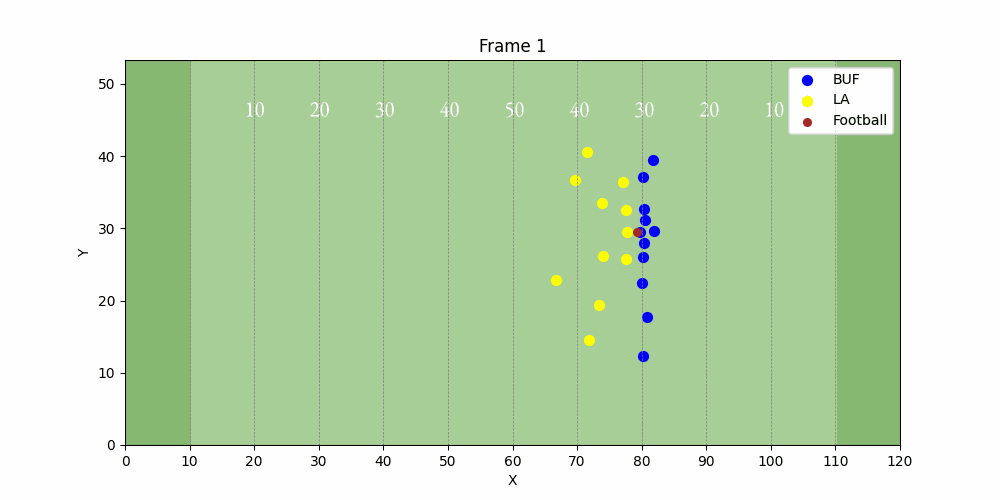

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np
from IPython.display import display, Image

background_img = mpimg.imread('/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/football_field.jpg')

gif_frames = []

for frame_id in sorted(play80['frameId'].unique()):
    frame_data = play80[play80['frameId'] == frame_id]
    
    fig, ax = plt.subplots(figsize=(10, 5))  
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Frame {frame_id}')

    ax.imshow(background_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.8)

    
    ax.set_xticks(range(0, 121, 10))  
    ax.grid(color='gray', linestyle='--', linewidth=0.5, axis = 'x')  
    
    ax.scatter(frame_data[frame_data['club'] == 'BUF']['x'], 
               frame_data[frame_data['club'] == 'BUF']['y'], 
               color='blue', s=50, label='BUF')
    ax.scatter(frame_data[frame_data['club'] == 'LA']['x'], 
               frame_data[frame_data['club'] == 'LA']['y'], 
               color='yellow', s=50, label='LA')
    ax.scatter(frame_data[frame_data['club'] == 'football']['x'], 
               frame_data[frame_data['club'] == 'football']['y'], 
               color='brown', s=30, label='Football', marker='o')
    
    ax.legend(loc='upper right')
    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    
    gif_frames.append(image)
    
    plt.close(fig)

gif_path = 'players_positions_with_background.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.1)

display(Image(filename=gif_path))

## VISUALIZATIONS

In [154]:
frame = 146
# snap = 147, last frame = 188 
play3698 = tracking2[(tracking2['gameId'] == 2022091809) 
                          & (tracking2['playId'] == 3698)]
                        #   & (tracking2['frameType'] == 'SNAP')]

play3698_ball = tracking2[(tracking2['gameId'] == 2022091809) 
                          & (tracking2['playId'] == 3698) 
                          & (tracking2['frameId'] == frame) 
                          & (tracking2['club'] == 'football')]

play3698_team1 = tracking2[(tracking2['gameId'] == 2022091809) 
                           & (tracking2['playId'] == 3698) 
                           & (tracking2['frameId'] == frame) 
                           & (tracking2['club'] == 'CIN')]
play3698_team1

play3698_team2 = tracking2[(tracking2['gameId'] == 2022091809) 
                           & (tracking2['playId'] == 3698) 
                           & (tracking2['frameId'] == frame) 
                           & (tracking2['club'] == 'DAL')]
play3698

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
2421624,2022091809,3698,41235.0,Anthony Barr,1,BEFORE_SNAP,2022-09-18 23:15:30,42.0,DAL,right,23.430000,33.05,1.39,0.22,0.14,341.00,352.67,NaN
2421625,2022091809,3698,41235.0,Anthony Barr,2,BEFORE_SNAP,2022-09-18 23:15:30.1,42.0,DAL,right,23.410000,33.18,1.38,0.19,0.14,342.23,350.11,NaN
2421626,2022091809,3698,41235.0,Anthony Barr,3,BEFORE_SNAP,2022-09-18 23:15:30.2,42.0,DAL,right,23.370000,33.32,1.38,0.50,0.14,343.05,345.89,NaN
2421627,2022091809,3698,41235.0,Anthony Barr,4,BEFORE_SNAP,2022-09-18 23:15:30.3,42.0,DAL,right,23.330000,33.45,1.37,0.79,0.14,343.05,340.94,NaN
2421628,2022091809,3698,41235.0,Anthony Barr,5,BEFORE_SNAP,2022-09-18 23:15:30.4,42.0,DAL,right,23.280000,33.58,1.36,0.71,0.14,341.38,338.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425943,2022091809,3698,NaN,football,184,AFTER_SNAP,2022-09-18 23:15:48.3,NaN,football,right,21.240000,15.58,3.02,2.66,0.30,NaN,NaN,tackle
2425944,2022091809,3698,NaN,football,185,AFTER_SNAP,2022-09-18 23:15:48.4,NaN,football,right,21.100000,15.31,2.78,1.54,0.30,NaN,NaN,NaN
2425945,2022091809,3698,NaN,football,186,AFTER_SNAP,2022-09-18 23:15:48.5,NaN,football,right,20.930000,15.05,2.72,2.48,0.31,NaN,NaN,NaN
2425946,2022091809,3698,NaN,football,187,AFTER_SNAP,2022-09-18 23:15:48.6,NaN,football,right,20.730000,14.80,2.61,3.30,0.33,NaN,NaN,NaN


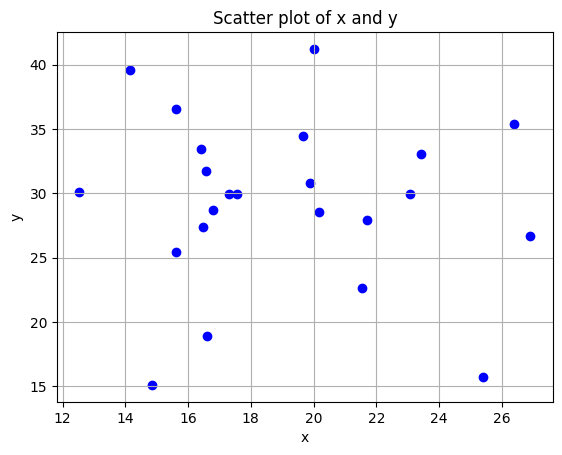

In [93]:
plt.scatter(play3698['x'], play3698['y'], marker='o', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.grid(True)
plt.show()


/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_16302/1835265172.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(fig.canvas.buffer_rgba())


ValueError: Could not find a backend to open `<memory at 0x14b6307c0>`` with iomode `ri`.

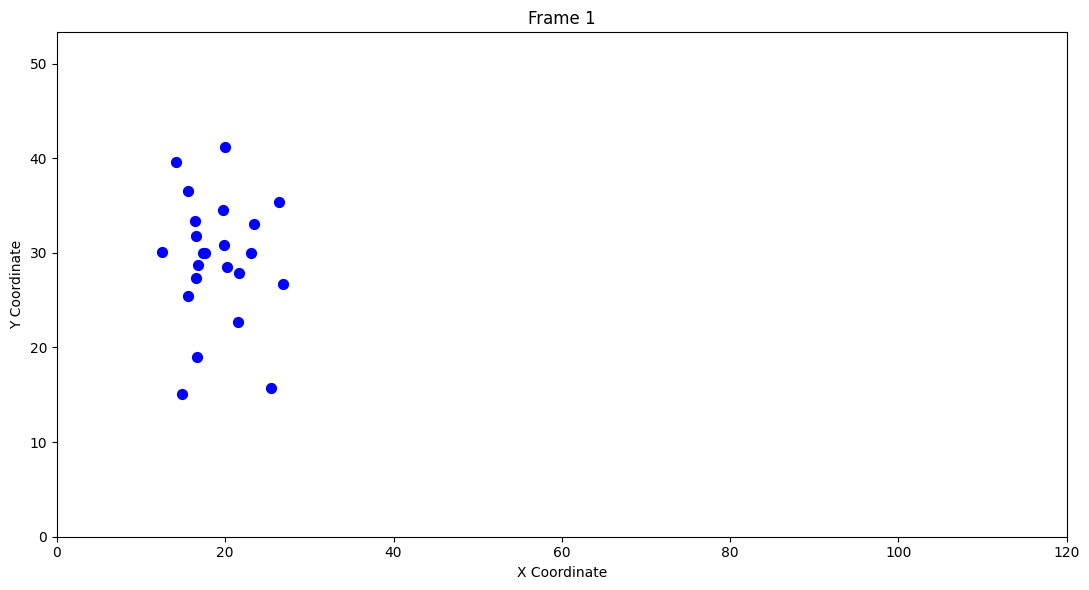

In [84]:
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image, display

gif_frames = []

for frame_id in sorted(play3698['frameId'].unique()):
    frame_data = play3698[play3698['frameId'] == frame_id]
    
    fig, ax = plt.subplots(figsize=(11, 6))
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    
    ax.scatter(frame_data['x'], frame_data['y'], color='blue', s=50) 

    ax.set_title(f'Frame {frame_id}')
    
    plt.tight_layout()
    
    fig.canvas.draw()
    img = imageio.imread(fig.canvas.buffer_rgba())

    img = imageio.imread(fig.canvas.buffer_rgba(), pilmode='RGBA')

    gif_frames.append(img)
    
    plt.grid(True)
    plt.close(fig)



gif_path = 'temp.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.5)

display(Image(filename=gif_path))


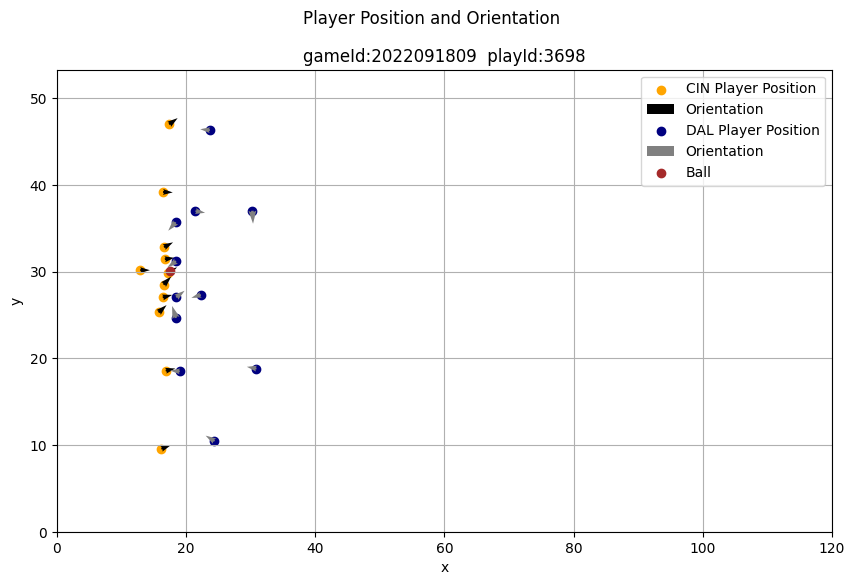

In [155]:
import numpy as np

# adjusted_angles = 180 - play3698_team1['o'] 
angles_rad1 = np.radians(90-play3698_team1['o'])

arrow_length = 1.5

dx1 = np.cos(angles_rad1) * arrow_length
dy1 = np.sin(angles_rad1) * arrow_length

angles_rad2 = np.radians(90-play3698_team2['o'])

dx2 = np.cos(angles_rad2) * arrow_length
dy2 = np.sin(angles_rad2) * arrow_length

plt.figure(figsize=(10, 6))
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.scatter(play3698_team1['x'], play3698_team1['y'], c='orange', label='CIN Player Position')
plt.quiver(play3698_team1['x'], play3698_team1['y'], dx1, dy1, angles='xy', scale_units='xy', scale=1, color='black', label='Orientation')

plt.scatter(play3698_team2['x'], play3698_team2['y'], color='navy', label='DAL Player Position')
plt.quiver(play3698_team2['x'], play3698_team2['y'], dx2, dy2, angles='xy', scale_units='xy', scale=1, color='grey', label='Orientation')

plt.scatter(play3698_ball['x'], play3698_ball['y'], color='brown', label = 'Ball')

plt.xlabel('x')
plt.ylabel('y')
plt.suptitle('Player Position and Orientation')
plt.title('gameId:2022091809  playId:3698')
plt.legend()
plt.grid(True)
plt.show()


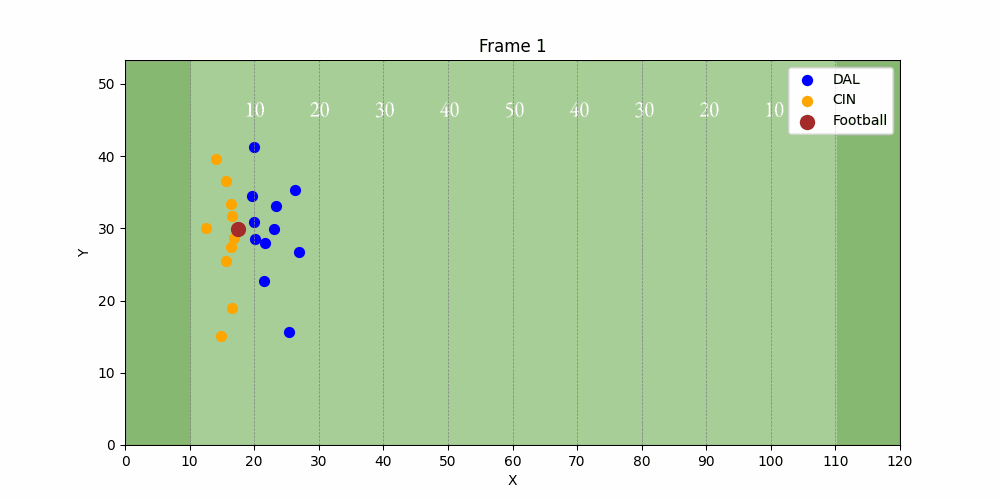

In [163]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np
from IPython.display import display, Image

background_img = mpimg.imread('/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/football_field.jpg')

gif_frames = []

for frame_id in sorted(play3698['frameId'].unique()):
    frame_data = play3698[play3698['frameId'] == frame_id]
    
    fig, ax = plt.subplots(figsize=(10, 5))  
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Frame {frame_id}')

    ax.imshow(background_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.8)

    
    ax.set_xticks(range(0, 121, 10))  
    ax.grid(color='gray', linestyle='--', linewidth=0.5, axis = 'x')  
    
    ax.scatter(frame_data[frame_data['club'] == 'DAL']['x'], 
               frame_data[frame_data['club'] == 'DAL']['y'], 
               color='blue', s=50, label='DAL')
    ax.scatter(frame_data[frame_data['club'] == 'CIN']['x'], 
               frame_data[frame_data['club'] == 'CIN']['y'], 
               color='orange', s=50, label='CIN')
    ax.scatter(frame_data[frame_data['club'] == 'football']['x'], 
               frame_data[frame_data['club'] == 'football']['y'], 
               color='brown', s=100, label='Football', marker='o')
    
    ax.legend(loc='upper right')
    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    
    gif_frames.append(image)
    
    plt.close(fig)

gif_path = 'players_positions_with_background.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.1)

display(Image(filename=gif_path))